In [72]:
import re
import nxviz as nv
import networkx as nx
from networkx.algorithms import bipartite
from networkx.algorithms import intersection
from nxviz import CircosPlot
from nxviz import ArcPlot
from collections import Counter
import matplotlib.pyplot as plt
# nxviz is Python3x optimized
import sys
sys.version_info

sys.version_info(major=3, minor=6, micro=3, releaselevel='final', serial=0)

In [56]:
# Get text to parse
text = "Cyberspace. A consensual hallucination experienced daily by billions of legitimate operators, in every nation, by children being taught mathematical concepts... A graphic representation of data abstracted from banks of every computer in the human system. Unthinkable complexity. Lines of light ranged in the nonspace of the mind, clusters and constellations of data. Like city lights, receding"

In [57]:
# Use regex wto generate list, this list can be used to add edges later
words_split = re.findall(r'\w+', text)
words_split = [ x.lower() for x in words_split ]
print('Text as list:',words_split)
print('Text lenght:',len(words_split), 'items.')

Text as list: ['cyberspace', 'a', 'consensual', 'hallucination', 'experienced', 'daily', 'by', 'billions', 'of', 'legitimate', 'operators', 'in', 'every', 'nation', 'by', 'children', 'being', 'taught', 'mathematical', 'concepts', 'a', 'graphic', 'representation', 'of', 'data', 'abstracted', 'from', 'banks', 'of', 'every', 'computer', 'in', 'the', 'human', 'system', 'unthinkable', 'complexity', 'lines', 'of', 'light', 'ranged', 'in', 'the', 'nonspace', 'of', 'the', 'mind', 'clusters', 'and', 'constellations', 'of', 'data', 'like', 'city', 'lights', 'receding']
Text lenght: 56 items.


In [58]:
# Generate key-value pairs from wc list where k is the word and v is the occurence of it

word_occurene = []
word_occurence = sorted(Counter(words_split).items())
print(word_occurence)

[('a', 2), ('abstracted', 1), ('and', 1), ('banks', 1), ('being', 1), ('billions', 1), ('by', 2), ('children', 1), ('city', 1), ('clusters', 1), ('complexity', 1), ('computer', 1), ('concepts', 1), ('consensual', 1), ('constellations', 1), ('cyberspace', 1), ('daily', 1), ('data', 2), ('every', 2), ('experienced', 1), ('from', 1), ('graphic', 1), ('hallucination', 1), ('human', 1), ('in', 3), ('legitimate', 1), ('light', 1), ('lights', 1), ('like', 1), ('lines', 1), ('mathematical', 1), ('mind', 1), ('nation', 1), ('nonspace', 1), ('of', 6), ('operators', 1), ('ranged', 1), ('receding', 1), ('representation', 1), ('system', 1), ('taught', 1), ('the', 3), ('unthinkable', 1)]


In [59]:
# Initialize graph object as G

G = nx.Graph()

In [60]:
# The count is generated from the total count of words in the text,
# and will help to create edges. The count starts from 1 as there is no word in text with 0 occurence.

count = [i for i in range(1,len(words_split)+1)]
print('Counters generated: ' + str(count))

Counters generated: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56]


In [61]:
# Add nodes from list wc - word count
# Add nodes from list count

G.add_nodes_from(words_split, bipartite='word')
G.add_nodes_from(count, bipartite='count')

In [62]:
# Print key-value pairs from bipartite graph

[ (k,v) for k,v in G.nodes(data=True) ]

[('cyberspace', {'bipartite': 'word'}),
 ('a', {'bipartite': 'word'}),
 ('consensual', {'bipartite': 'word'}),
 ('hallucination', {'bipartite': 'word'}),
 ('experienced', {'bipartite': 'word'}),
 ('daily', {'bipartite': 'word'}),
 ('by', {'bipartite': 'word'}),
 ('billions', {'bipartite': 'word'}),
 ('of', {'bipartite': 'word'}),
 ('legitimate', {'bipartite': 'word'}),
 ('operators', {'bipartite': 'word'}),
 ('in', {'bipartite': 'word'}),
 ('every', {'bipartite': 'word'}),
 ('nation', {'bipartite': 'word'}),
 ('children', {'bipartite': 'word'}),
 ('being', {'bipartite': 'word'}),
 ('taught', {'bipartite': 'word'}),
 ('mathematical', {'bipartite': 'word'}),
 ('concepts', {'bipartite': 'word'}),
 ('graphic', {'bipartite': 'word'}),
 ('representation', {'bipartite': 'word'}),
 ('data', {'bipartite': 'word'}),
 ('abstracted', {'bipartite': 'word'}),
 ('from', {'bipartite': 'word'}),
 ('banks', {'bipartite': 'word'}),
 ('computer', {'bipartite': 'word'}),
 ('the', {'bipartite': 'word'}),
 (

In [63]:
# Add edges from cdc

G.add_edges_from(word_occurence)

In [64]:
# Print edge pairs:

[ i for i in G.edges() ]

[('cyberspace', 1),
 ('a', 2),
 ('consensual', 1),
 ('hallucination', 1),
 ('experienced', 1),
 ('daily', 1),
 ('by', 2),
 ('billions', 1),
 ('of', 6),
 ('legitimate', 1),
 ('operators', 1),
 ('in', 3),
 ('every', 2),
 ('nation', 1),
 ('children', 1),
 ('being', 1),
 ('taught', 1),
 ('mathematical', 1),
 ('concepts', 1),
 ('graphic', 1),
 ('representation', 1),
 ('data', 2),
 ('abstracted', 1),
 ('from', 1),
 ('banks', 1),
 ('computer', 1),
 ('the', 3),
 ('human', 1),
 ('system', 1),
 ('unthinkable', 1),
 ('complexity', 1),
 ('lines', 1),
 ('light', 1),
 ('ranged', 1),
 ('nonspace', 1),
 ('mind', 1),
 ('clusters', 1),
 ('and', 1),
 ('constellations', 1),
 ('like', 1),
 ('city', 1),
 ('lights', 1),
 ('receding', 1)]

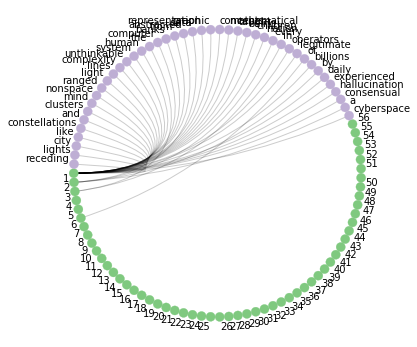

In [65]:
# Visualize bipartite graph where counters and words are separate set of edges

c = CircosPlot(G, node_color='bipartite', node_grouping='bipartite', node_labels=True)
c.draw()
plt.show()

In [66]:
# Word occurence in decreasing order:

print('Total number of words in text is: ', len(words_split))
for i in count:
    if G.degree[i] != 0:
        if (G.degree[i]) == 1:
             print('There are' ,i,'occurence of words:',str(list(G.adj[i])).strip('[]'))
        else:
            print('There is' ,i,'occurence of words:',str(list(G.adj[i])).strip('[]'))       

Total number of words in text is:  56
There is 1 occurence of words: 'abstracted', 'and', 'banks', 'being', 'billions', 'children', 'city', 'clusters', 'complexity', 'computer', 'concepts', 'consensual', 'constellations', 'cyberspace', 'daily', 'experienced', 'from', 'graphic', 'hallucination', 'human', 'legitimate', 'light', 'lights', 'like', 'lines', 'mathematical', 'mind', 'nation', 'nonspace', 'operators', 'ranged', 'receding', 'representation', 'system', 'taught', 'unthinkable'
There is 2 occurence of words: 'a', 'by', 'data', 'every'
There is 3 occurence of words: 'in', 'the'
There are 6 occurence of words: 'of'


In [67]:
# Find nodes with no edges and isolate them from other edges

no_edges = []
no_edges = [ i for i in nx.isolates(G) ]
no_edges = [ i for i in count if i in no_edges ]
print(no_edges)


[4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56]


In [70]:
# Get copy of G graph and remove nodes from list of "no_edges"

R=G.copy()
R.remove_nodes_from(no_edges)


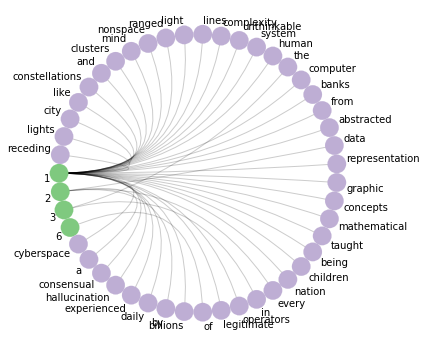

In [71]:
# Words with occurence displayed

d = CircosPlot(R, node_color='bipartite', node_grouping='bipartite', node_labels=True)
d.draw()
plt.show()

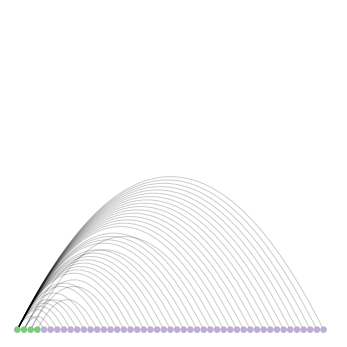

In [77]:
a = ArcPlot(R, node_color='bipartite', node_order='bipartite')
a.draw()
plt.show()

In [78]:

R.clear()
G.clear()